In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("B2W-Reviews01.csv",sep = ';')
subselect = ['product_name','product_brand','product_brand','site_category_lv1','site_category_lv2','review_title','review_text']
df = df[subselect]

/home/saraiva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


stopwords -> strip ->  acentos -> correcao (pal. sem acento) -> entidades -> minusculo -> 

ok ok ok correcao entidades minusculo

Realizacao de correção https://norvig.com/spell-correct.html


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
SAMPLED = True

if(SAMPLED == True):
    df = df.sample(15000)

## Uma breve Análise sobre "B2W-Reviews01.csv"

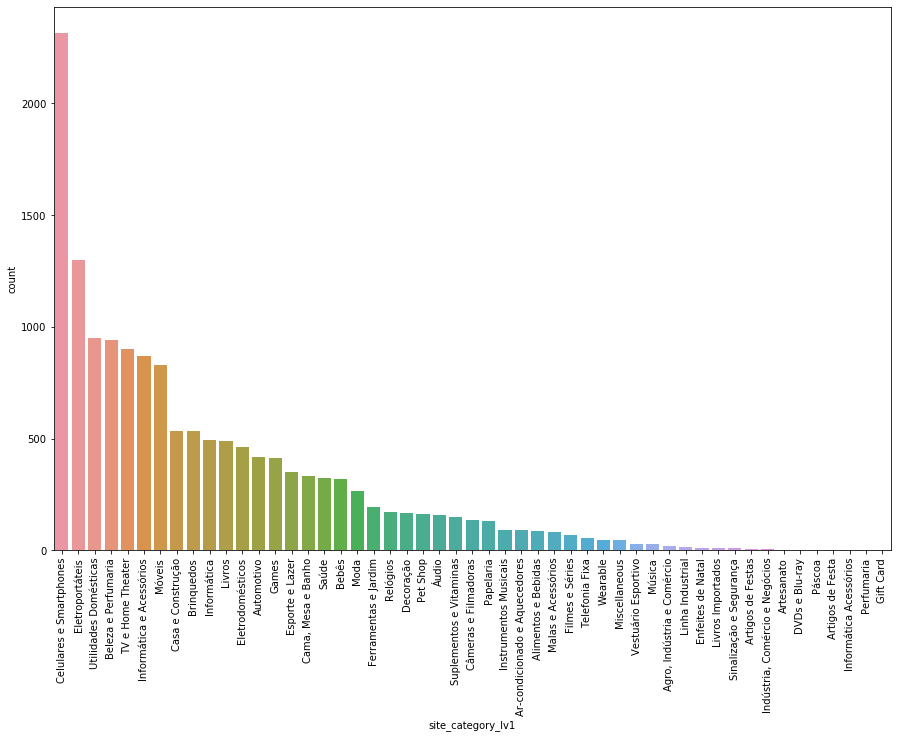

In [4]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['site_category_lv1'],order = df['site_category_lv1'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [5]:
from nltk.stem import RSLPStemmer
lisa = ['eu amo batatinhas batatinhas','eu t amo','diz pra mim que hoje nao da pé']
lisa2 = ['eu','amo','comer','batatinhas']
rslps = RSLPStemmer()
corpus = [rslps.stem(phrases) for phrases in lisa2]

In [8]:
import importlib

import text_helper
importlib.reload(text_helper)

text_data = df['review_text']
text_data = text_helper.rule_preprocessing(text_data,join_tokens=False)

Correcao de texto nao realizada


In [9]:
%%time
from gensim.models import TfidfModel
from gensim.models import LdaModel

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(text_data)

bow_corpus = [common_dictionary.doc2bow(text) for text in text_data]
bow_corpus
# Train the model on the corpus.
id2word = {value:key for (key,value) in common_dictionary.token2id.items()}
lda = LdaModel(bow_corpus, num_topics=10,id2word = id2word)

#tfidf with corpus
tfidf = TfidfModel(bow_corpus)

CPU times: user 6.18 s, sys: 8.34 ms, total: 6.19 s
Wall time: 6.3 s


In [93]:
from sklearn.metrics import pairwise_distances

topics_coordinates = lda.get_topics()
num_topics = lda.num_topics

topic_names = ['topico_' + str(i) for i in range(0,num_topics)]

topics_coordinates = pd.DataFrame(topics_coordinates,
                                  index = topic_names,
                                  columns = lda.id2word.values())

pd.DataFrame(pairwise_distances(topics_coordinates,metric = 'manhattan'),
            columns = topic_names,index = topic_names)

,topico_0,topico_1,topico_2,topico_3,topico_4,topico_5,topico_6,topico_7,topico_8,topico_9
topico_0,0.000000,1.078500,1.178707,1.122461,1.071358,1.058686,1.140066,1.045758,1.185447,1.011542
topico_1,1.078500,0.000000,1.008760,0.979005,0.627846,1.050207,1.094713,1.090420,1.109286,1.000608
topico_2,1.178707,1.008760,0.000000,1.111833,1.130567,1.175352,1.235285,1.129821,1.239667,1.192079
topico_3,1.122461,0.979005,1.111833,0.000000,1.057858,1.106841,1.125673,1.098015,1.109263,1.045256
topico_4,1.071358,0.627846,1.130567,1.057858,0.000000,1.070175,1.153917,1.219246,1.086548,0.993046
topico_5,1.058686,1.050207,1.175352,1.106841,1.070175,0.000000,1.120004,1.121685,1.200260,0.889548
topico_6,1.140066,1.094713,1.235285,1.125673,1.153917,1.120004,0.000000,1.278181,1.108427,1.067744
topico_7,1.045758,1.090420,1.129821,1.098015,1.219246,1.121685,1.278181,0.000000,1.326232,1.258229
topico_8,1.185447,1.109286,1.239667,1.109263,1.086548,1.200260,1.108427,1.326232,0.000000,1.170863
topico_9,1.011542,1.000608,1.192079,1.045256,0.993046,0.889548,1.067744,1.258229,1.170863,0.000000


In [15]:
import importlib
import topic_modeling_helper

importlib.reload(topic_modeling_helper)

topic_modeling_helper.similarity_topics(lda)

Temos 10 topicos formados
Temos 18256 palavras no nosso dicionario


,topico_0,topico_1,topico_2,topico_3,topico_4,topico_5,topico_6,topico_7,topico_8,topico_9
topico_0,0.000055,0.978854,0.939815,0.893690,0.977714,0.908708,0.898035,0.923882,0.941266,0.899452
topico_1,0.978854,0.000000,0.940297,0.918302,0.948259,0.915637,0.921267,0.925705,0.935192,0.926423
topico_2,0.939815,0.940297,0.000006,0.625316,0.952160,0.671769,0.654397,0.728974,0.800291,0.677076
topico_3,0.893690,0.918302,0.625316,0.000000,0.955937,0.363765,0.326838,0.481549,0.627764,0.365013
topico_4,0.977714,0.948259,0.952160,0.955937,0.000000,0.937441,0.955314,0.956660,0.961491,0.960458
topico_5,0.908708,0.915637,0.671769,0.363765,0.937441,0.000000,0.420725,0.550202,0.675661,0.453973
topico_6,0.898035,0.921267,0.654397,0.326838,0.955314,0.420725,0.000000,0.526227,0.659359,0.424234
topico_7,0.923882,0.925705,0.728974,0.481549,0.956660,0.550202,0.526227,0.000000,0.727527,0.553309
topico_8,0.941266,0.935192,0.800291,0.627764,0.961491,0.675661,0.659359,0.727527,0.000000,0.679264
topico_9,0.899452,0.926423,0.677076,0.365013,0.960458,0.453973,0.424234,0.553309,0.679264,0.000005


In [56]:
TOPIC_NUMBER = 2

#para um dado topico podemos ver quais sao as palavras mais importantes
topic_terms = pd.DataFrame(lda.get_topic_terms(TOPIC_NUMBER,topn = 30),columns = ['index','value'])
id2word_df = pd.DataFrame.from_dict(lda.id2word,orient = 'index')
topic_top_info = topic_terms.merge(id2word_df,left_on = 'index',right_index = True)


print(topic_top_info['value'].sum())
topic_top_info

0.283380983164534


,index,value,0
0,25,0.071602,<NUM>
1,50,0.022181,dia
2,31,0.015754,nao
3,33,0.014196,pra
4,13,0.012995,uso
5,3,0.011542,produto
6,165,0.010209,so
7,262,0.010079,jogo
8,101,0.009277,
9,43,0.008576,comprei
